# Assignment 2

## Applying a neural network to a business problem
### Part 1:  Classification problem

Insert your code after `# YOUR CODE HERE`.  
**NOTE:** This notebook will be graded.

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('Mamo_data.csv', delimiter = ",")

In [6]:
# Explore the size of the data set
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 830
Number of columns: 11


In [9]:
# Explore type of data and feature names
# data types
data_types = df.dtypes
print("\nData types:")
print(data_types)

#feature names
feature_names = df.columns
print("Feature names:")
print(feature_names)



Data types:
malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object
Feature names:
Index(['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4',
       'margin2', 'margin3', 'margin4', 'margin5', 'density'],
      dtype='object')


Choose `malignanttrue` as the `y` variable, and the rest of the variables except the unnamed column as `X` variables.
**Note:** For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

In [10]:
# Split data into features (X) and response (y)
target_column = 'malignanttrue'

# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Split the data into features (X) and response (y)
X = df.drop(columns=[target_column])  
y = df[target_column]                

# Display the shapes of X and y
print("Features shape (X):", X.shape)
print("Response shape (y):", y.shape)

Features shape (X): (830, 10)
Response shape (y): (830,)


In [11]:
# Explore type of data and feature names
# You can use df.head() or df.tail() to see the first or last few records, respectively.
# However, if data is sorted, it is better to view some randomly sampled records
df.sample(10, random_state=0)

# data types
data_types = df.dtypes
print("\nData types of each feature:")
print(data_types)

# feature names
feature_names = df.columns
print("Feature names:")
print(feature_names)

# first few records
print("\nFirst few records:")
print(df.head())

# last few records
print("\nLast few records:")
print(df.tail())

# Randomly sample a few records
random_sample = df.sample(n=6, random_state=1)
print("\nRandomly sampled records:")
print(random_sample)



Data types of each feature:
malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object
Feature names:
Index(['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4',
       'margin2', 'margin3', 'margin4', 'margin5', 'density'],
      dtype='object')

First few records:
   malignanttrue  score  age  shape2  shape3  shape4  margin2  margin3  \
0              0      0   45       1       0       0        0        0   
1              1      0   69       0       0       1        0        0   
2              0      0   58       0       0       1        0        0   
3              1      0   72       0       0       1        0        1   
4              1      0   71       0       0       1        0        0   

   margin4  margin5  density  
0        1        0        3  
1      

In [12]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array
# Extract the response variable as a DataFrame

y_df = df[[target_column]]  # Keep it as a DataFrame

# Convert the DataFrame to a flattened array
y_flat = y_df.to_numpy().flatten()  

# Display the flattened array
print("Flattened array:")
print(y_flat)


Flattened array:
[0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 1

In [13]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Display the shapes of the resulting sets
print("Training features shape (X_train):", X_train.shape)
print("Testing features shape (X_test):", X_test.shape)
print("Training response shape (y_train):", y_train.shape)
print("Testing response shape (y_test):", y_test.shape)

Training features shape (X_train): (622, 10)
Testing features shape (X_test): (208, 10)
Training response shape (y_train): (622,)
Testing response shape (y_test): (208,)


Scale the data in the next cell.  
Use the variable names `X_train` and `X_test`.

In [14]:
# Scale the data
scaler = StandardScaler()  

# Remember to fit using only the training data
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled testing features shape:", X_test_scaled.shape)

Scaled training features shape: (622, 10)
Scaled testing features shape: (208, 10)


Next, fit a two-layer MLP classifier with 5 nodes on each layer.

In [ ]:
reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

Can you get a better accuracy? More nodes on each layer could lead to overfitting. Fewer nodes could make the model too sparse. Use cross validation to find the optimal number of nodes per layer.

In [15]:
# Fit and check accuracy for various numbers of nodes on both layers
# Note that this will take some time
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

    # Display the final scores
print("\nValidation scores for various node configurations:")
for config, score in validation_scores.items():
    print(f"Nodes: {config} -> Score: {score:.5f}")

best_config = max(validation_scores, key=validation_scores.get)
best_model = MLPClassifier(max_iter=1000, hidden_layer_sizes=best_config, random_state=1)
best_model.fit(X_train_scaled, y_train)

# Evaluate accuracy
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"\nBest Configuration: {best_config} -> Test Accuracy: {test_accuracy:.5f}")

Nodes |Validation
      | score
(3, 3) : 0.52251
(3, 4) : 0.52251
(3, 5) : 0.47749
(4, 3) : 0.47749
(4, 4) : 0.47749
(4, 5) : 0.52251


c:\Users\LengaR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LengaR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(5, 3) : 0.79743
(5, 4) : 0.46624
(5, 5) : 0.52251

Validation scores for various node configurations:
Nodes: (3, 3) -> Score: 0.52251
Nodes: (3, 4) -> Score: 0.52251
Nodes: (3, 5) -> Score: 0.47749
Nodes: (4, 3) -> Score: 0.47749
Nodes: (4, 4) -> Score: 0.47749
Nodes: (4, 5) -> Score: 0.52251
Nodes: (5, 3) -> Score: 0.79743
Nodes: (5, 4) -> Score: 0.46624
Nodes: (5, 5) -> Score: 0.52251

Best Configuration: (5, 3) -> Test Accuracy: 0.83654


In [16]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.7974
This corresponds to nodes (5, 3)


Use the tuple that was printed for `optimal_hidden_layer_sizes` to construct the first of two lines of code to fit data with the best parameter.
For the first line, complete the following code in the code cell below: 
```
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(?,?), random_state=1)
```

In [17]:
# Fit data with best parameter
best_config = max(validation_scores, key=validation_scores.get)
print(f"\nBest Configuration: {best_config} -> Validation Score: {validation_scores[best_config]:.5f}")

best_model = MLPClassifier(max_iter=1000, hidden_layer_sizes=best_config, random_state=1)
best_model.fit(X_train_scaled, y_train)

test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test Accuracy with Best Configuration: {test_accuracy:.5f}")




Best Configuration: (5, 3) -> Validation Score: 0.79743
Test Accuracy with Best Configuration: 0.83654


In [20]:
# Predict
y_pred = best_model.predict(X_test_scaled)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.5f}")


Accuracy: 0.83654


For the response curves, categorical variables should be fixed at distinct values. By fixing the margin variable at its first unique value, its second unique value, and so on, the response curves show the effect for various levels of the margin variable. 

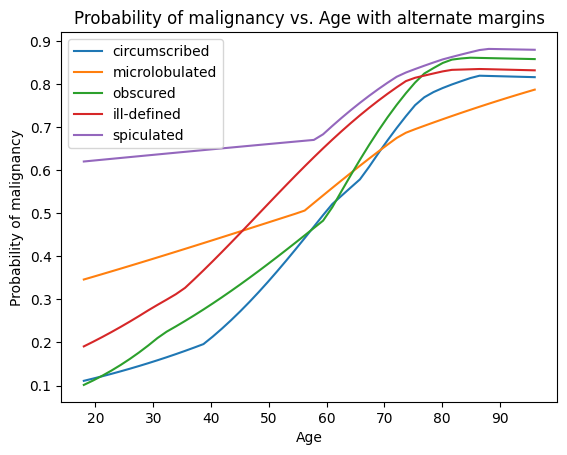

In [22]:
# Visualise probability of malignancy vs age with alternate margins
# Copy dataframe so as not to change the original, and obtain means
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    # Change margins
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Find the min and max of the desired feature and set up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = best_model.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

### Now answerr the following questions about this notebook for Part 1.

#### Question 1
The biomedical industry uses machinery to capture images and other data, and also software that provides the specialist with information to make decisions. These software applications often use vast data sets such as the mammogram data set you used in the notebook. 

- Consider the medical data and the context in which it is used. Why is machine learning, and specifically neural networks, an appropriate method for prediction in these circumstances? `(Max. 200 words)`

     ```ANSWER: Machine learning, particularly neural networks are ideal for analysing medical data. Neural networks excel at recognizing complicated patterns within huge datasets, which is critical in medical settings where data might be high-dimensional and intricate, such as imaging or genetic data.

Another reason is that neural networks' ability to learn from both organized and unstructured data enables them to integrate a wide range of information, such as patient demographics and medical history. T

Furthermore, Their capacity for real-time processing helps fast diagnoses and treatment suggestions, which can be vital in life-threatening situations.```


#### Question 2

- What is the purpose of a response curve in the context of neural networks? What insights can be gained from the response curves you generated in this IDE notebook? `(Max. 200 words)`

     ```ANSWER: A response curve in the context of neural networks shows how the model's predictions change in response to changes in input features. This visualization aids in understanding the relationship between inputs and outputs, providing insights into the model's behavior and decision-making process.
     
     
- The graph illustrates that the probability of malignancy grows with age, which is consistent with medical literature. A 20-year-old has a 0.1 likelihood, whereas a 70-year-old has a much larger danger.
- Different tumor kinds (circumscribed, microlobulated, etc.) become more common in elderly people, increasing the chance of malignancy.
- Younger people often have stronger immune systems than older adults, which may assist prevent tumor formation.
- The findings highlight the importance of age-specific screening and prevention efforts, looking out for older groups due to their higher risk. ```

### Part 2: Use Python to perform K-means clustering to inform a business case

In [23]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [27]:
# Import data
df = pd.read_csv(r'C:\Users\LengaR\Downloads\Assignment 2\Assignment 2\online_shoppers_intention.csv', delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [28]:
# Explore type of data and feature names
df.sample(8)
# data types
data_types = df.dtypes
print("\nData types of each feature:")
print(data_types)

# feature names
feature_names = df.columns
print("Feature names:")
print(feature_names)



Data types of each feature:
Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
Feature names:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend

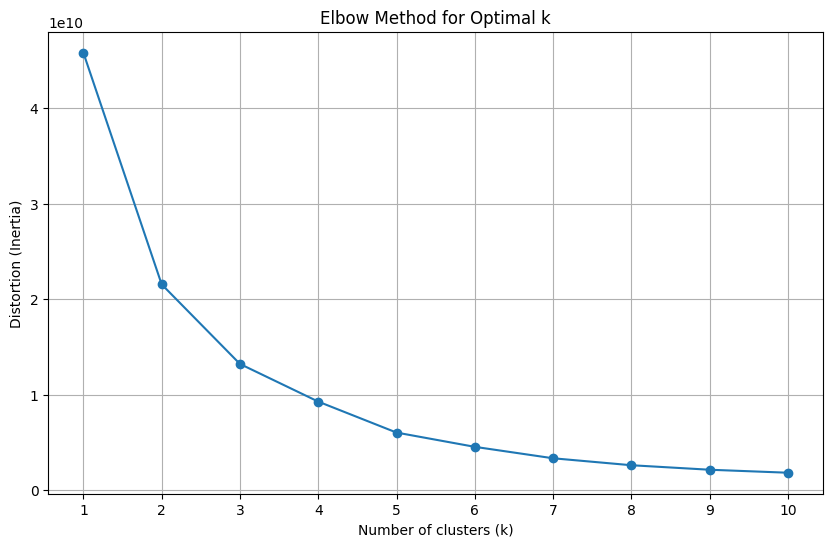

In [29]:
# Find optimal number of clusters

# 1. Elbow method
# Calculate distortions
distortions = []

# Select numerical features for clustering
X = df[['Administrative', 'Administrative_Duration', 'Informational',
         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
         'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
         'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']].values

# Calculate distortions for a range of clusters
distortions = []
K = range(1, 11)  # Testing cluster sizes from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Inertia is the sum of squared distances

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(K)
plt.grid()
plt.show()


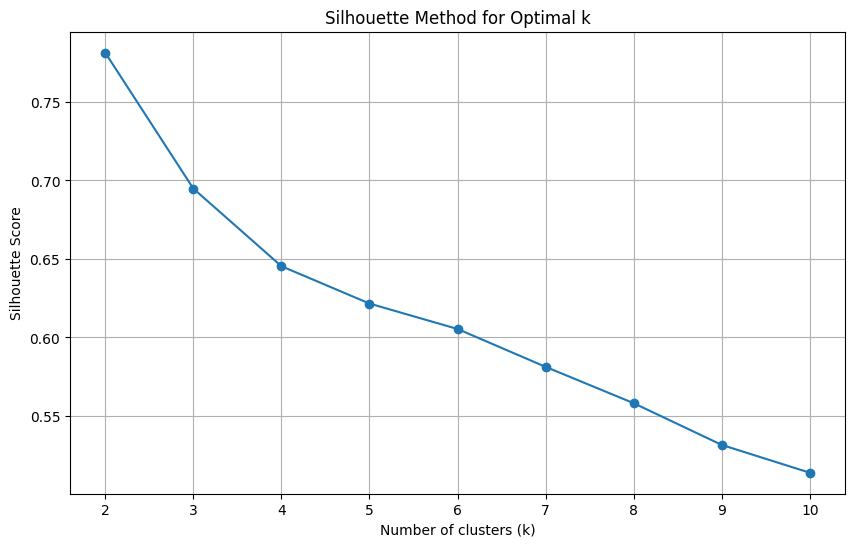

In [30]:
# 2. Silhouette method
sil = []
kmax = 10
sil = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    sil.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, kmax + 1), sil, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, kmax + 1))
plt.grid()
plt.show()


Use the output from the elbow or silhouette method to decide how many clusters to use.

In [32]:
from sklearn.cluster import KMeans

In [35]:
# Cluster the data
# Hint: km = KMeans(....) and use init='kmeans++' 
optimal_k = 9  # Replace with your chosen number of clusters

km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
km.fit(X)

df['Cluster'] = km.labels_

print(df.head())




   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

Cluster
0    5752
6    3131
2    1782
8     922
7     460
1     193
5      64
3      10
4       2
Name: count, dtype: int64


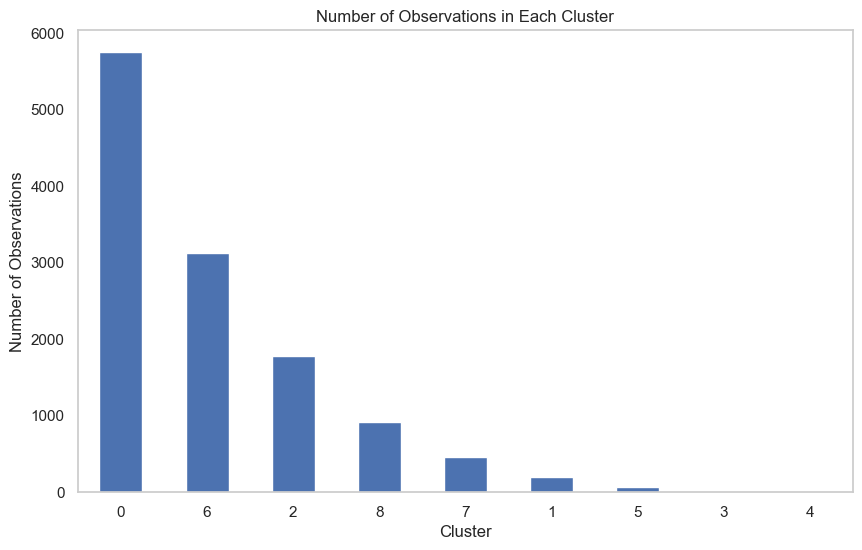

In [55]:
# Check how many observations are in each cluster
cluster_counts = df['Cluster'].value_counts()

print(cluster_counts)


cluster_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.grid()
plt.show()



In [39]:
# Set up a dataframe with cluster allocations
clustered_df = df.copy()  
clustered_df['Cluster'] = km.labels_  

# Display first few rows
print(clustered_df.head())



   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

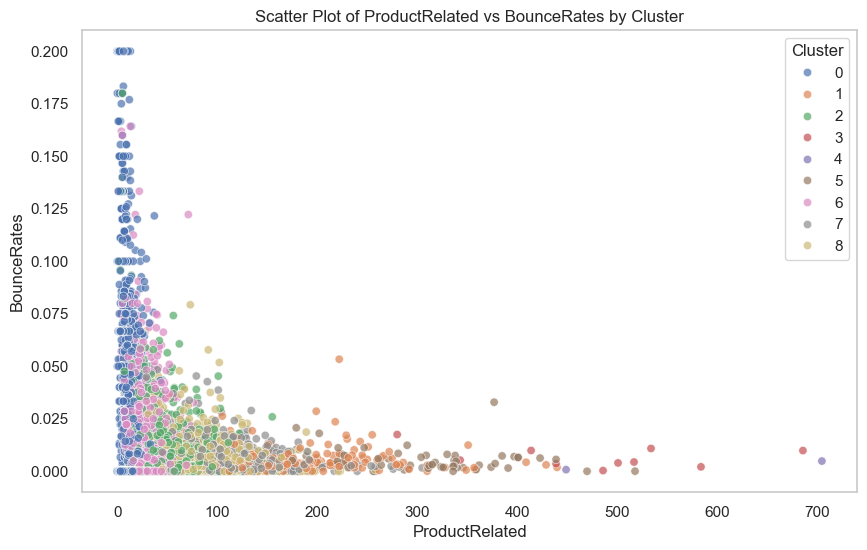

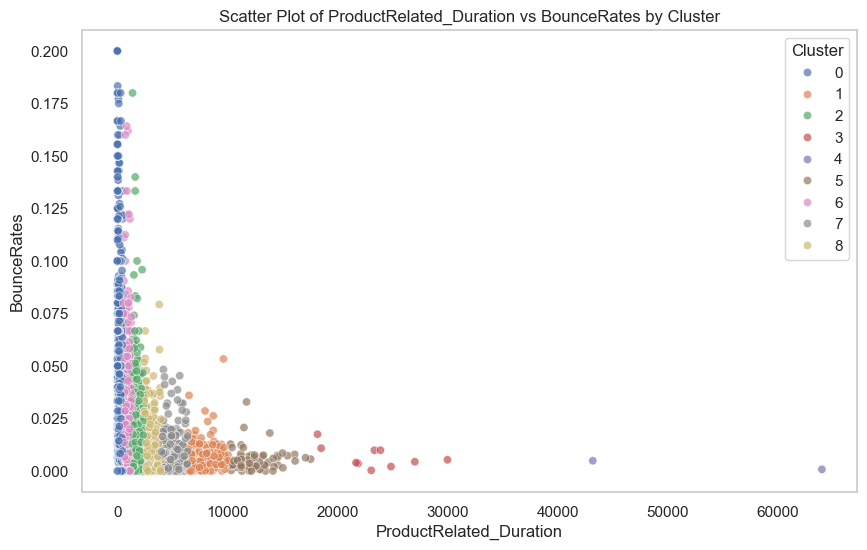

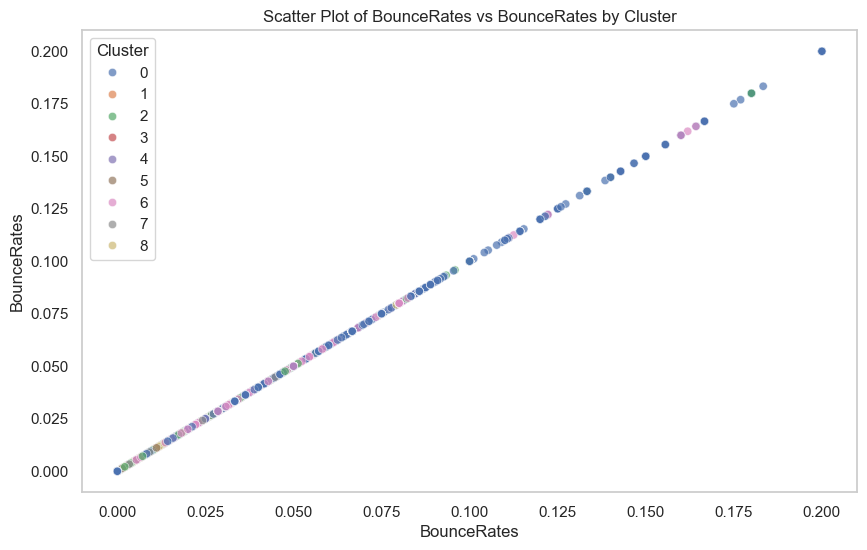

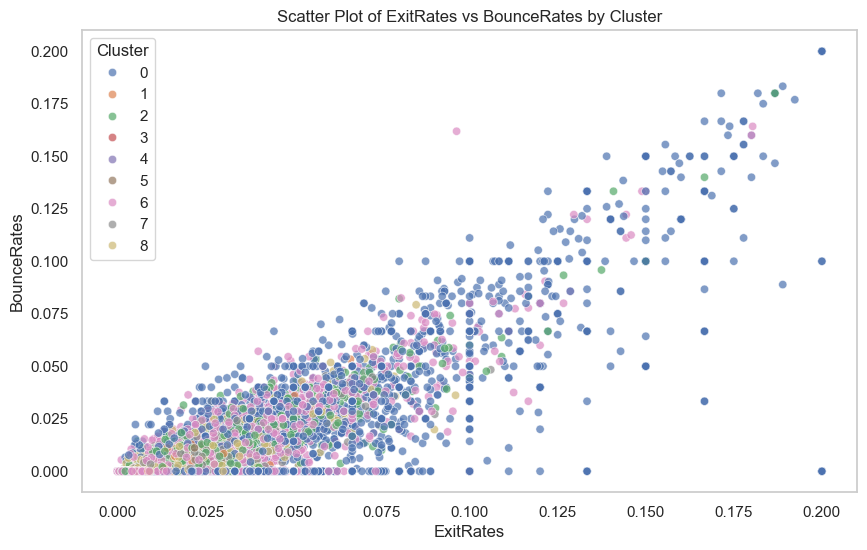

In [57]:
# Plot the following variables and their clusters
var = ['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates']

# Plot using seaborn

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pair of scatter plots for the specified variables colored by cluster
for variable in var:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=clustered_df, x=variable, y='BounceRates', hue='Cluster', palette='deep', alpha=0.7)
    plt.title(f'Scatter Plot of {variable} vs BounceRates by Cluster')
    plt.xlabel(variable)
    plt.ylabel('BounceRates')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()


### Now answer the following questions about this notebook for Part 2.

### Question 1	
At the end of the part 2, you created the pair-wise plots. Consider the behaviour of customers in each cluster based on the distribution and scatterplots related to the variable ProductRelated_Duration. 

- What insights can you gain from the scatterplots regarding the difference in behaviour of the different clusters? 
(Max. 300 words)

       ```ANSWER:
        *PLOT 1:*  Shows a negative relationship between bounce rates and product-related attributes. This indicates that as the product-related metric increases, the bounce rates tend to decrease. The clustering indicates that there may be different segments of users or product types influencing this relationship. The clusters at the higher bounce rates (0 & 4) indicate that as certain product-related features or characteristics are present, visitors are more likely to leave the page quickly. 

       *Bouncerates:* This indicates a positive correlation between bounce rates. As one measure of bounce rates increases, the other also tends to increase. This suggests that higher bounce rates are associated with increased user disengagement or dissatisfaction.The positive slope implies that products or pages with higher bounce rates are consistently failing to retain visitors, might be potential issues user experience.

       *Last plot:+* Indicates a positive correlation between bounce rates and exit rates, as one metric increases, the other does as well. In this case, if your bounce rates (the percentage of visitors who leave after viewing only one page) rise, exit rates (the percentage of visitors who leave your site from a specific page) also tend to rise.```


- Discuss the quality of the clustering solution by referring to the number of observations in each cluster and the distribution of the data along each dimension. How does this affect the way you can interpret the scatterplots? (Max. 200 words)
       
       ```ANSWER: The clustering solution's quality can be assessed by examining the number of observations in each cluster and the distribution of data. For example, if most data points are concentrated in a few clusters with clear characteristics, it indicates strong patterns that can inform strategies. Clusters with sparse data may make it difficult to generalize findings. 
       The positive correlation between bounce rates and product-related attributes suggests that products failing to engage users might not meet expectations, leading to higher bounce rates. This relationship indicates that as product-related metrics improve, user engagement likely increases. Thus, scatterplots should be interpreted with caution, especially in sparse clusters, as they could misrepresent user behavior or product performance.```

### Question 2

Discuss whether the K-means algorithm was an appropriate method for identifying clusters in this particular data set by referring to at least two elements of the data set that contributed to your decision.

The following are some elements that you could take into consideration to justify your answer:
- Discuss the applicability of the K-means algorithm for the number of observations in the data set. Compare this data set with one that has substantially more observations (e.g. 900,000 vs the present 12,000).
- There were some outliers in the data set. How do you think this can influence the predictive capability of the analysis? (Max. 300 words)

       ```ANSWER: The K-means algorithm can be a suitable method for identifying clusters in this dataset, particularly due to its ability to handle larger datasets and its simplicity. The current dataset's size of 12,000 observations provides a balanced foundation for the algorithm, allowing it to effectively identify clusters based on the inherent patterns in the data. A much larger dataset, such as one with 900,000 observations, may require more complex clustering methods to account for increased variability and potential overlaps in clusters.
       The presence of outliers can significantly impact the K-means clustering process. Since K-means uses centroid-based distance metrics, outliers can skew the cluster centroids, leading to misleading interpretations of user behavior. In this dataset, if outliers represent extreme user behavior, they could distort the clustering results and undermine the algorithm's predictive capabilities. ```
        

### THE END!